In [28]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from keras import regularizers
from keras.optimizers import RMSprop, Adadelta, Adam, Adamax, Nadam
from keras.callbacks import Callback
from keras import backend as K
from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np
from keras.utils import np_utils


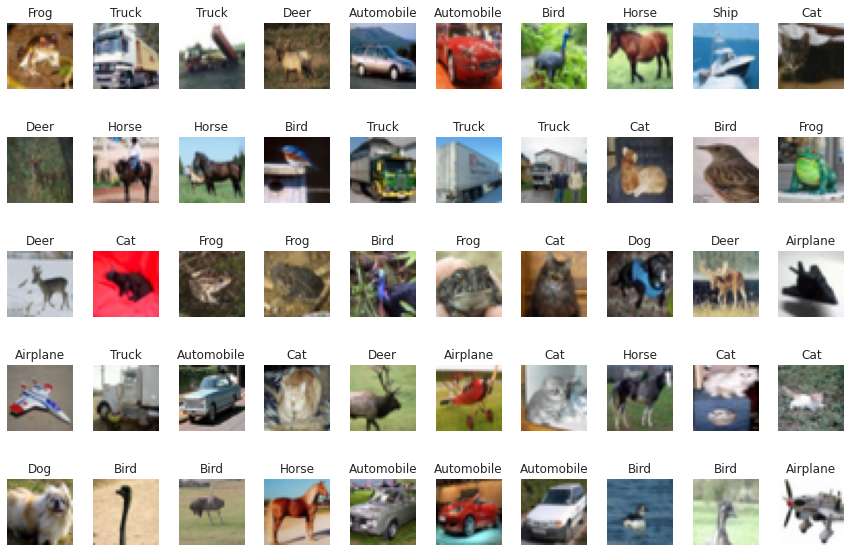

In [16]:
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
plt.figure(figsize=(15,10))
sns.set_style('white')
for i in range(50):  
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i].reshape((32, 32, 3)),cmap=plt.cm.hsv)
    plt.title(labels[y_train.reshape(1,len(y_train))[0][i]])
    plt.axis('off')
plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [17]:
X_train = X_train.astype('float32')
X_validation = X_validation.astype('float32')
std_x_valid = np.std(X_validation)
mean_x_train = np.mean(X_train)
mean_x_valid = np.mean(X_validation)
X_train = X_train/mean_x_train
X_validation = X_validation/mean_x_valid
y_temp = y_validation

In [18]:
y_train = np_utils.to_categorical(y_train.transpose()).reshape(50000,10)
y_validation = np_utils.to_categorical(y_validation.transpose()).reshape(10000,10)
input_shape = (32,32,3)

In [30]:
 
def lr_schedule(epoch):
    lrate = 0.001
    if epoch > 75:
        lrate = 0.0005
    if epoch > 100:
        lrate = 0.0003
    return lrate
 
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
#z-score
mean = np.mean(x_train,axis=(0,1,2,3))
std = np.std(x_train,axis=(0,1,2,3))
x_train = (x_train-mean)/(std+1e-7)
x_test = (x_test-mean)/(std+1e-7)
 
num_classes = 10
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)
 
weight_decay = 1e-4
model = Sequential()
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(1e-4,1e-4), input_shape=x_train.shape[1:]))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same',kernel_regularizer=regularizers.l1_l2(1e-4,1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
 
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(1e-4,1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(1e-4,1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))
 
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(1e-4,1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l1_l2(1e-4,1e-4)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))
 
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))
 
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_6 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)       

In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
# train the network
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

# validate the model on test dataset to determine generalization
score = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * score[1]))


Epoch 1/20
391/391 [==============================] - 6s 16ms/step - loss: 2.9474 - accuracy: 0.3750
Epoch 2/20
391/391 [==============================] - 6s 16ms/step - loss: 2.3469 - accuracy: 0.5021
Epoch 3/20
391/391 [==============================] - 6s 16ms/step - loss: 2.0927 - accuracy: 0.5738
Epoch 4/20
391/391 [==============================] - 6s 16ms/step - loss: 1.9516 - accuracy: 0.6182
Epoch 5/20
391/391 [==============================] - 6s 16ms/step - loss: 1.8622 - accuracy: 0.6429
Epoch 6/20
391/391 [==============================] - 6s 16ms/step - loss: 1.7969 - accuracy: 0.6608
Epoch 7/20
391/391 [==============================] - 6s 16ms/step - loss: 1.7390 - accuracy: 0.6780
Epoch 8/20
391/391 [==============================] - 6s 16ms/step - loss: 1.6885 - accuracy: 0.6919
Epoch 9/20
391/391 [==============================] - 6s 16ms/step - loss: 1.6496 - accuracy: 0.7008
Epoch 10/20
391/391 [==============================] - 6s 16ms/step - loss: 1.6076 - accura